In [3]:
import pandas as pd
df = pd.read_csv("BMI.csv")
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [22]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [23]:
from sklearn.tree import DecisionTreeClassifier as dt
dt = dt(criterion="gini")

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df[['Height','Weight','Gender']], df['Index'],test_size=0.3,random_state=1,shuffle=True)

In [28]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [29]:
from sklearn.tree import export_text
print(export_text(dt,feature_names=['Height','Weight','Gender']))

|--- Weight <= 105.50
|   |--- Weight <= 83.50
|   |   |--- Height <= 152.00
|   |   |   |--- Weight <= 66.50
|   |   |   |   |--- Weight <= 57.50
|   |   |   |   |   |--- Height <= 145.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- Height >  145.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- Weight >  57.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- Weight >  66.50
|   |   |   |   |--- Height <= 141.50
|   |   |   |   |   |--- Weight <= 77.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- Weight >  77.50
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- Height >  141.50
|   |   |   |   |   |--- class: 4
|   |   |--- Height >  152.00
|   |   |   |--- Weight <= 65.50
|   |   |   |   |--- Height <= 167.50
|   |   |   |   |   |--- Height <= 162.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Height >  162.50
|   |   |   |   |   |   |--- Weight <= 57.50
|   |   |   |   |   |   |   |--- Height <= 164.00
|  

[Text(0.6407158430232558, 0.9583333333333334, 'x[1] <= 105.5\ngini = 0.74\nsamples = 350\nvalue = [9, 18, 49, 48, 88, 138]'),
 Text(0.428234011627907, 0.875, 'x[1] <= 83.5\ngini = 0.793\nsamples = 179\nvalue = [9, 18, 49, 44, 38, 21]'),
 Text(0.17914244186046513, 0.7916666666666666, 'x[0] <= 152.0\ngini = 0.739\nsamples = 105\nvalue = [9, 18, 44, 19, 13, 2]'),
 Text(0.05813953488372093, 0.7083333333333334, 'x[1] <= 66.5\ngini = 0.636\nsamples = 18\nvalue = [0, 0, 1, 7, 8, 2]'),
 Text(0.03488372093023256, 0.625, 'x[1] <= 57.5\ngini = 0.219\nsamples = 8\nvalue = [0, 0, 1, 7, 0, 0]'),
 Text(0.023255813953488372, 0.5416666666666666, 'x[0] <= 145.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(0.011627906976744186, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.03488372093023256, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.046511627906976744, 0.5416666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0,

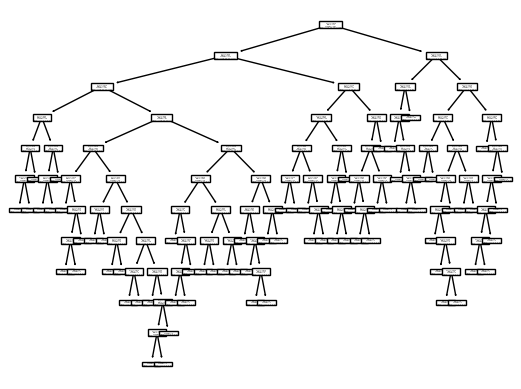

In [30]:
from sklearn.tree import plot_tree as pt
pt(dt)

In [31]:
print("training accuracy is ",dt.score(xtrain,ytrain))
print("Test Accuracy =",dt.score(xtest,ytest))

training accuracy is  1.0
Test Accuracy = 0.8733333333333333


In [34]:
pt(dt.best_estimator_)

AttributeError: 'DecisionTreeClassifier' object has no attribute '_best_estimator_'

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
gv = {'criterion':['gini','entrophy'],'max_depth':[2,3,4,5,6],'max_features':[1,2,3]}
model = GridSearchCV(DecisionTreeClassifier(),param_grid=gv,scoring='accuracy',cv=5)
model.fit(xtrain,ytrain)

/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/rahu

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3]},
             scoring='accuracy')

In [37]:
model.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=3)

[Text(0.583984375, 0.9285714285714286, 'x[1] <= 105.5\ngini = 0.74\nsamples = 350\nvalue = [9, 18, 49, 48, 88, 138]'),
 Text(0.365234375, 0.7857142857142857, 'x[1] <= 83.5\ngini = 0.793\nsamples = 179\nvalue = [9, 18, 49, 44, 38, 21]'),
 Text(0.1640625, 0.6428571428571429, 'x[0] <= 152.0\ngini = 0.739\nsamples = 105\nvalue = [9, 18, 44, 19, 13, 2]'),
 Text(0.078125, 0.5, 'x[1] <= 66.5\ngini = 0.636\nsamples = 18\nvalue = [0, 0, 1, 7, 8, 2]'),
 Text(0.046875, 0.35714285714285715, 'x[1] <= 57.5\ngini = 0.219\nsamples = 8\nvalue = [0, 0, 1, 7, 0, 0]'),
 Text(0.03125, 0.21428571428571427, 'x[1] <= 53.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(0.015625, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.046875, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.0625, 0.21428571428571427, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0, 0]'),
 Text(0.109375, 0.35714285714285715, 'x[0] <= 141.5\ngini = 0

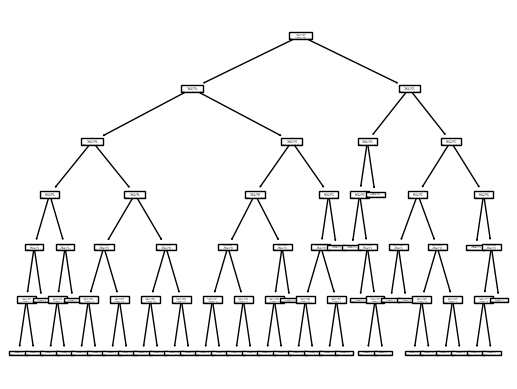

In [38]:
pt(model.best_estimator_
   )